In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load data
wine = load_wine()

# create the dataframe model
df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

In [4]:
# Split the data into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3, random_state=42)

# Standaryzacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# List of algorithms to compare
models = [('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVM', SVC())]

# comparing with cross validation
results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('{}: {:.2f}% (± {:.2f}%)'.format(name, cv_results.mean()*100, cv_results.std()*100))


KNN: 95.26% (± 5.19%)
DT: 92.88% (± 5.42%)
RF: 95.96% (± 5.31%)
SVM: 97.56% (± 3.72%)


In [6]:
# Choosing the best algorithm for this task
best_model = models[np.argmax([np.mean(results[i]) for i in range(len(models))])][1]
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

In [7]:
# Check its accuracy with the testing set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

Dokładność modelu: 98.15%


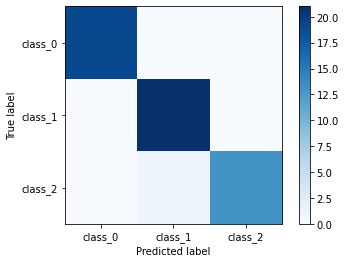

In [8]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(3), wine.target_names)
plt.yticks(np.arange(3), wine.target_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [9]:
# exemplary predictions
n_samples = 5
samples_idx = np.random.randint(X_test.shape[0], size=n_samples)
samples = X_test[samples_idx, :]
predicted_labels = best_model.predict(samples)
for i, (sample, label) in enumerate(zip(samples, predicted_labels)):
    print('Sample {}: {}'.format(i+1, wine.target_names[label]))
    print('Features:', sample)

Próbka 1: class_1
Cechy: [-0.34997135 -1.29613973 -0.46750687 -0.43226965 -0.12277022 -0.11258512
 -0.06688563 -0.50908545 -0.22956008 -1.08035541  1.16262801  0.76809156
 -0.94659172]
Próbka 2: class_1
Cechy: [-0.75565714 -1.18683648 -0.31981043 -1.00862919  0.00790366 -0.3429573
 -0.91116654  2.10797193 -2.0420963  -0.78204556  1.24853307 -1.27675854
 -0.18870183]
Próbka 3: class_1
Cechy: [ 1.64266179 -0.65853742  1.23100217  1.58498872 -0.18810717  0.80890362
 -0.69264678  1.31492424  1.91095888  3.68342346 -1.672239   -0.87876758
 -0.2546053 ]
Próbka 4: class_0
Cechy: [ 1.59493405 -0.43993091  1.30485039  0.14408988  1.24930559  0.80890362
  1.12504036 -0.27117115  0.65081466  0.56264347  0.47538752  0.06817643
  1.78840225]
Próbka 5: class_1
Cechy: [ 1.64266179 -0.65853742  1.23100217  1.58498872 -0.18810717  0.80890362
 -0.69264678  1.31492424  1.91095888  3.68342346 -1.672239   -0.87876758
 -0.2546053 ]
